<a href="https://colab.research.google.com/github/Jugraunaqsingh/GANS-SYNTHETIC-DATA-GENERATION/blob/main/GANS_TSLA_generated_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating synthetic data from tabular data


## import statements


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader

# Define the dataset class
class TSLA_Dataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# Define the Generator model
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 6),  # Output 6 features
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

# Define the Discriminator model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(6, 256),  # Input 6 features
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Function to train the GAN
def train_gan(generator, discriminator, dataloader, num_epochs=10, lr=0.0002):
    criterion = nn.BCELoss()
    optimizer_g = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
    optimizer_d = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

    for epoch in range(num_epochs):
        for i, real_data in enumerate(dataloader):
            # Train Discriminator
            optimizer_d.zero_grad()
            real_data = real_data.to(device)
            real_decision = discriminator(real_data)
            real_loss = criterion(real_decision, torch.ones_like(real_decision))

            z = torch.randn(real_data.size(0), 100).to(device)
            gen_data = generator(z)
            fake_decision = discriminator(gen_data.detach())
            fake_loss = criterion(fake_decision, torch.zeros_like(fake_decision))

            d_loss = real_loss + fake_loss
            d_loss.backward()
            optimizer_d.step()

            # Train Generator
            optimizer_g.zero_grad()
            gen_data = generator(z)
            gen_decision = discriminator(gen_data)
            g_loss = criterion(gen_decision, torch.ones_like(gen_decision))
            g_loss.backward()
            optimizer_g.step()

            if (i+1) % 100 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(dataloader)}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}")

# Load dataset and preprocess
file_path = 'TSLA.csv'
df = pd.read_csv(file_path)
data = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values
scaler = MinMaxScaler(feature_range=(-1, 1))
data_normalized = scaler.fit_transform(data)
data_normalized = torch.FloatTensor(data_normalized)

# Set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Initialize models and move to device
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Initialize DataLoader
batch_size = 64
dataset = TSLA_Dataset(data_normalized)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Train GAN
train_gan(generator, discriminator, dataloader, num_epochs=50)  # Adjust num_epochs as needed

# Generate synthetic data
num_samples = 1000
z = torch.randn(num_samples, 100).to(device)
gen_data = generator(z).detach().cpu().numpy()
gen_data = scaler.inverse_transform(gen_data)

# Create DataFrame with generated data
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
generated_df = pd.DataFrame(gen_data, columns=columns)

# Save generated data to CSV
generated_file_path = 'generatedtsladata.csv'
generated_df.to_csv(generated_file_path, index=False)

print(f"Generated data saved to {generated_file_path}")


Generated data saved to generatedtsladata.csv




**GENERATING THE DATA AS WELL AS ANALYSING IT**
♈
---



Generated data saved to pranav.csv
Real Data Statistics:
               Open         High          Low        Close    Adj Close  \
count  2416.000000  2416.000000  2416.000000  2416.000000  2416.000000   
mean    186.271147   189.578224   182.916639   186.403651   186.403651   
std     118.740163   120.892329   116.857591   119.136020   119.136020   
min      16.139999    16.629999    14.980000    15.800000    15.800000   
25%      34.342498    34.897501    33.587501    34.400002    34.400002   
50%     213.035004   216.745002   208.870002   212.960007   212.960007   
75%     266.450012   270.927513   262.102501   266.774994   266.774994   
max     673.690002   786.140015   673.520020   780.000000   780.000000   

             Volume  
count  2.416000e+03  
mean   5.572722e+06  
std    4.987809e+06  
min    1.185000e+05  
25%    1.899275e+06  
50%    4.578400e+06  
75%    7.361150e+06  
max    4.706500e+07  
Generated Data Statistics:
               Open         High          Low     

<ipython-input-1-64aefe511c57>:314: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(real_data[col], label='Real', shade=True)
<ipython-input-1-64aefe511c57>:315: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_df[col], label='Generated', shade=True)
<ipython-input-1-64aefe511c57>:314: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(real_data[col], label='Real', shade=True)
<ipython-input-1-64aefe511c57>:315: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_df[col], label='Generated', shad

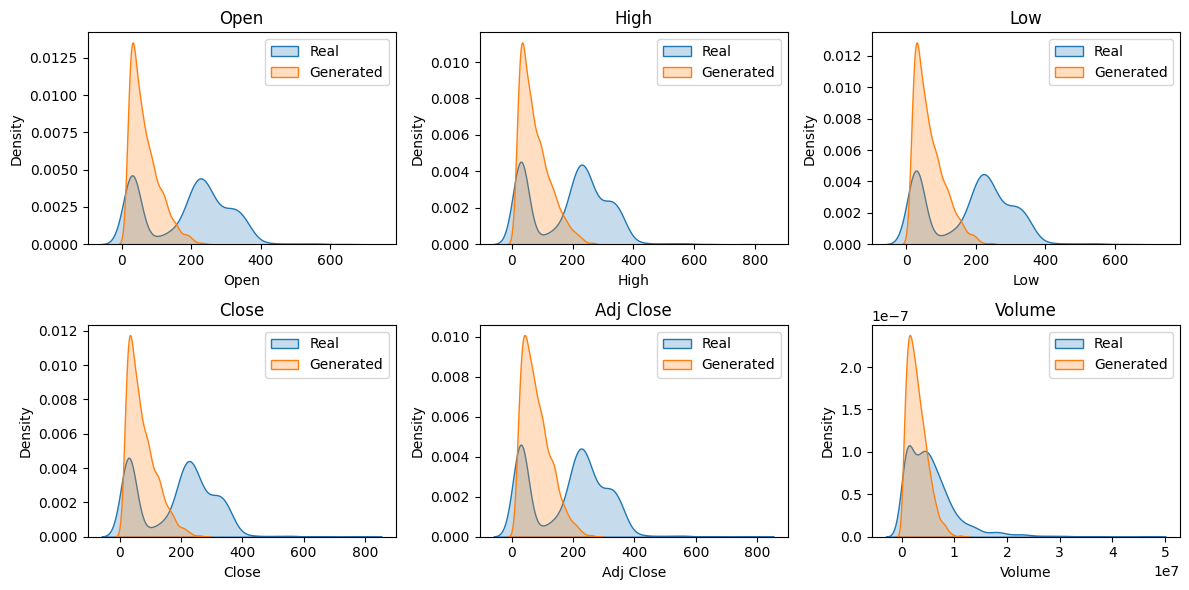

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader
#he Dataset class is an abstract class representing a dataset. To create a custom dataset,
#you need to subclass Dataset and override the following methods:
#The DataLoader class provides an iterable over the given dataset, with support for batching,
#shuffling, and parallel data loading using multiple workers.

# __len__: Returns the size of the dataset.
# __getitem__: Retrieves a sample from the dataset at the given index.
# torch.utils.data.DataLoader
# The DataLoader class provides an iterable over the given dataset, with support for batching, shuffling, and parallel data loading using multiple workers.
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns

# Define the dataset class
class TSLA_Dataset(Dataset):

    #The __init__ method is a special method in Python classes,
    #often referred to as the constructor. It is automatically
    #called when a new instance (object) of the class is created.
    #This method is used to initialize the attributes of the class.
    def __init__(self, data):
        self.data = data
    #The __len__ method in Python is a special method used to define the behavior
    #of the len() function for instances of a class. Let's break down what the method
    #__len__ does in the context of the TSLA_Dataset class.
    def __len__(self):
        return len(self.data)

    #The __getitem__ method is another special method in Python that allows an instance of a class
    # to use the indexing and slicing syntax. It is used to access an item at a specific position
    # (index) in the object.

    def __getitem__(self, idx):
        return self.data[idx]
    #eg:
    #data = [1, 2, 3, 4, 5]  # Example data
#dataset = TSLA_Dataset(data)  # Create an instance of TSLA_Dataset
#print(dataset[0])  # Access the first item using indexing
#print(dataset[2])  # Access the third item using indexing

# Define the Generator model
#This class defines a neural network model for generating synthetic data.
#It's composed of two main parts: the __init__ method, which sets up the architecture
#of the network, and the forward method, which defines how data passes through the network.

class Generator(nn.Module): #This is the base class for all neural network modules in PyTorch.
#By inheriting from nn.Module, the Generator class gains all the functionality of a PyTorch neural network module

  #The __init__ method is a constructor that initializes the instance of the Generator class.
  #Here's the breakdown:
    def __init__(self):
        super(Generator, self).__init__() #call the parent class(nn.module)
        #This line ensures that the __init__ method of nn.Module is called, initializing the Generator instance properly as a module.
        #It sets up the necessary internal structures for parameter management and other functionalities provided by nn.Module.

        self.model = nn.Sequential(                     #nn.Sequential is a container module in PyTorch that allows you to define a neural
                                                        #network model by stacking layers together in a sequential manner. This means that the
                                                        #output of one layer is the input to the next layer, and so on.
                                                        #It is a convenient way to build a model where each layer is applied in order,
                                                        #one after the other.
      #now these are layers and activation functions that define the architecture of the neural network model
            nn.Linear(100, 256), #Fully Connected (Linear) Layer
            #This layer expects input vectors of size 100.
            #This layer transforms the input vector into a vector of size 256.(output features)
            #thus this nn.linear function Performs a linear transformation on the input data using a weight matrix W and
            #a bias vector
                                                        #y=Wx+b

            nn.ReLU(True), #Rectified Linear Unit - Activation Function
                    #Activation Function: In the context of neural networks, an activation function is a function applied
                    #to the output of a neuron. The purpose of an activation function is to introduce non-linearity
                    #into the network, enabling it to learn complex patterns and relationships in the data.
#The ReLU function is mathematically expressed as:
#y=max(0,x) This means that for any input value 𝑥
#If x is greater than 0, the output 𝑦 will be x.If x is less than or equal to 0, the output y will be 0.
#if negative values are there, it can go to a continous infinite loop
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 6),  # Output 6 features
            #Fully Connected (Linear) Layer
            #This layer expects input vectors of size 512, which is the output size of the previous layer.
            #This layer transforms the input vector into a vector of size 6
            #Function: Performs a linear transformation on the input data to reduce its dimensionality to 6,
            #which matches the number of features in the generated data (e.g., Open, High, Low, Close, Adj Close, Volume).

            nn.Tanh() #Hyperbolic Tangent , also an activation function #Scales the final output to the range of -1 to 1
            #This normalization ensures that the generated data has values within the same range as the real data
            #(assuming the data was preprocessed to this range).

        )

    def forward(self, x):
        return self.model(x)

# Define the Discriminator model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(6, 256),  # Input 6 features This layer expects input vectors of size 6.
            #These correspond to the 6 features of the data (e.g., Open, High, Low, Close, Adj Close,
            #Volume). This layer transforms the input vector into a vector of size 256.
            nn.LeakyReLU(0.2, inplace=True), # here 0.2 is negative slope
            #which is : This parameter determines the slope of the function for negative input values.
            #Instead of setting all negative values to zero (as in standard ReLU), Leaky ReLU
            #allows a small, non-zero gradient when the input is negative
            # Applies the Leaky ReLU activation function to introduce non-linearity
            #y=max(0.2x,x)

            nn.Linear(256, 1), #Performs a linear transformation on the input data,
            #reducing the dimensionality to 1, which represents the probability
            #that the input is real or fake.
            nn.Sigmoid() #Activation function
            #y=1/1+e^-x
            #The Sigmoid function squashes the output to a range between 0 and 1, making it suitable for binary classification.
            #In the context of GANs, this output represents the probability that the input data is real (as opposed to generated).
        )

    def forward(self, x):
        return self.model(x)

# Function to train the GAN:  This function trains a Generative Adversarial Network (GAN), consisting of a generator and a discriminator
def train_gan(generator, discriminator, dataloader, num_epochs=1000, lr=0.0002):
#generator: The generator model, which creates synthetic data.
#discriminator: The discriminator model, which evaluates the authenticity of the data.
#dataloader: A DataLoader object that provides batches of real data for training.
#num_epochs: The number of times the entire dataset will be passed through the network. Default is 100.
#lr: Learning rate for the optimizers. Default is 0.0002.

    criterion = nn.BCELoss()

    #Binary Cross Entropy (BCE) is a loss function used for binary classification tasks.
    #In the context of GANs, it's used to measure how well the discriminator distinguishes between real and fake data,
    #and how well the generator fools the discriminator.
    #For a single data point, the BCE loss is calculated as:
#BCE(y, y^ )=−(y⋅log( y^ )+(1−y)⋅log(1− y^ ))
#Where:y is the true label (1 for real, 0 for fake).
#𝑦^ is the predicted probability by the model.
#For the discriminator, the BCE loss is computed for both real and fake data. The real data should be classified as 1, and the fake data should be classified as 0.
#For the generator, the BCE loss is computed to see how well the generator can fool the discriminator. The fake data produced by the generator should be classified as 1.
    optimizer_g = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
    optimizer_d = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))
    #An optimizer is an algorithm used to adjust the weights of the neural network to minimize the loss function.
    #The Adam optimizer is an extension of the
    #Stochastic Gradient Descent (SGD) that computes adaptive learning rates for each parameter.
    #Mathematics of Adam Optimizer
#The Adam optimizer combines the advantages of two other extensions of SGD: AdaGrad and RMSProp.
#Moment Estimation:a statistical technique used to estimate the parameters of a probability distribution by equating the sample moments (calculated from a dataset) with
#the corresponding population moments (defined by the theoretical distribution)

#Adam maintains two moment estimates, the first moment (mean) and the second moment (uncentered variance).

#FIRST MOMENT(MEAN): m(t)​=β(1)​⋅m(t−1)​+(1−β(1)​)⋅g(t)​
#SECOND MOMENT(Variance): v(t)​=β(2)​⋅v(t)−1​+(1−β(2)​)⋅g(t)^2​
#Gradients (gₜ): The gradient of the loss function with respect to the parameters at time step t.
# Gradients tell us the direction and the rate of change for the parameters.
#Learning Rate (α): A hyperparameter that controls how much to change the model's parameters in response to the estimated error
#each time the model weights are updated.

#Moment Estimates:

#First Moment (mₜ): This is the mean of the gradients.
#Second Moment (vₜ): This is the uncentered variance (or the average of the squared gradients).


#NOW HERE THE CODE IS :
#optimizer_g = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
#optimizer_d = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))
#SO,
#Steps Involved Initialize the Adam Optimizer:
#We are initializing two Adam optimizers: one for the generator (optimizer_g) and one for the discriminator (optimizer_d).
#Parameters: generator.parameters(): The parameters of the generator model that will be updated during training. discriminator.parameters(): The parameters of the discriminator model that will be updated during training.
#lr: The learning rate, which controls the step size for updating the parameters. It determines how quickly or slowly the model learns.
#betas=(0.5, 0.999): Hyperparameters for the Adam optimizer that control the exponential decay rates of the moment estimates.
#Detailed Explanation 1. Learning Rate (lr): The learning rate determines the size of the steps taken to reach the optimal parameters.
#A smaller learning rate means smaller steps and more precise convergence but can take longer.
# A larger learning rate means larger steps and faster convergence but can overshoot the optimal parameters.
#2. Betas (β1, β2): These are the exponential decay rates for the moment estimates in Adam.
#β1 = 0.5: This controls the decay rate of the first moment estimate (mean of the gradients). A lower value of β1 gives more weight to the recent gradient information.
#β2 = 0.999: This controls the decay rate of the second moment estimate (variance of the gradients). A value close to 1 gives a more stable estimate of the variance.
#Step-by-Step Execution First Moment Estimate (mₜ):
#For each parameter, compute the mean of the gradients.
#Formula: 𝑚 𝑡 = 𝛽 1 ⋅ 𝑚 𝑡 − 1 + ( 1 − 𝛽 1 ) ⋅ 𝑔 𝑡 m t ​ =β 1 ​ ⋅m t−1 ​ +(1−β 1 ​ )⋅g t ​
#Second Moment Estimate (vₜ): For each parameter, compute the uncentered variance (mean of the squared gradients).
#Formula: 𝑣 𝑡 = 𝛽 2 ⋅ 𝑣 𝑡 − 1 + ( 1 − 𝛽 2 ) ⋅ 𝑔 𝑡 2 v t ​ =β 2 ​ ⋅v t−1 ​ +(1−β 2 ​ )⋅g t 2 ​
#Bias Correction: Correct the bias in the moment estimates due to their initialization to zero.
#Corrected First Moment: 𝑚 ^ 𝑡 = 𝑚 𝑡 1 − 𝛽 1 𝑡 m ^ t ​ = 1−β 1 t ​ m t ​ ​
#Corrected Second Moment: 𝑣 ^ 𝑡 = 𝑣 𝑡 1 − 𝛽 2 𝑡 v ^ t ​ = 1−β 2 t ​ v t ​ ​
#Parameter Update: Use the corrected moment estimates to update the parameters. Formula: 𝜃 𝑡 + 1 = 𝜃 𝑡 − 𝛼 𝑣 ^ 𝑡 + 𝜖 ⋅ 𝑚 ^ 𝑡 θ t+1 ​ =θ t ​ − v ^ t ​ ​ +ϵ α ​ ⋅ m ^ t ​ Example Calculation for Generator Optimizer Let's consider an example where we use the Adam optimizer to update the generator's parameters: Initialize Parameters and Hyperparameters: Suppose 𝑚 0 = 0 m 0 ​ =0, 𝑣 0 = 0 v 0 ​ =0. 𝛽 1 = 0.5 β 1 ​ =0.5, 𝛽 2 = 0.999 β 2 ​ =0.999. Learning rate 𝛼 = 0.0002 α=0.0002. Small constant 𝜖 = 1 0 − 8 ϵ=10 −8 . Compute Gradient (gₜ): Assume the gradient 𝑔 𝑡 g t ​ is computed as 0.2 at time step 𝑡 t. First Moment Estimate (mₜ): If 𝑚 𝑡 − 1 m t−1 ​ was 0.1: 𝑚 𝑡 = 0.5 ⋅ 0.1 + ( 1 − 0.5 ) ⋅ 0.2 m t ​ =0.5⋅0.1+(1−0.5)⋅0.2 𝑚 𝑡 = 0.05 + 0.1 = 0.15 m t ​ =0.05+0.1=0.15 Second Moment Estimate (vₜ): If 𝑣 𝑡 − 1 v t−1 ​ was 0.01: 𝑣 𝑡 = 0.999 ⋅ 0.01 + ( 1 − 0.999 ) ⋅ ( 0.2 ) 2 v t ​ =0.999⋅0.01+(1−0.999)⋅(0.2) 2 𝑣 𝑡 = 0.00999 + 0.00004 = 0.01003 v t ​ =0.00999+0.00004=0.01003 Bias Correction: Suppose 𝑡 = 10 t=10: Corrected First Moment: 𝑚 ^ 𝑡 = 0.15 1 − 0. 5 10 ≈ 0.15 / 0.999 ≈ 0.150 m ^ t ​ = 1−0.5 10 0.15 ​ ≈0.15/0.999≈0.150 Corrected Second Moment: 𝑣 ^ 𝑡 = 0.01003 1 − 0.99 9 10 ≈ 0.01003 / 0.00995 ≈ 1.008 v ^ t ​ = 1−0.999 10 0.01003 ​ ≈0.01003/0.00995≈1.008 Parameter Update: Suppose the current parameter 𝜃 𝑡 = 0.5 θ t ​ =0.5: 𝜃 𝑡 + 1 = 0.5 − 0.0002 1.008 + 1 0 − 8 ⋅ 0.150 θ t+1 ​ =0.5− 1.008 ​ +10 −8 0.0002 ​ ⋅0.150 𝜃 𝑡 + 1 ≈ 0.5 − 0.000149 ≈ 0.499851 θ t+1 ​ ≈0.5−0.000149≈0.499851
    for epoch in range(num_epochs):
        for i, real_data in enumerate(dataloader): #dataloader: This is an iterable object that loads data in batches, commonly used in
        #training deep learning models. It provides batches of data for training.
        #enumerate(dataloader): This wraps the dataloader in an enumerate object, which pairs each batch of
        #data (real_data) with an index (i).


            # Train Discriminator
            optimizer_d.zero_grad() #Before computing the gradients for a new batch,
            #you need to zero out the gradients of the previous batch. This is necessary because
            #PyTorch accumulates gradients by default. Without zeroing them out, the gradients from
            #the previous forward-backward passes will accumulate, leading to incorrect updates.


            real_data = real_data.to(device)

            real_decision = discriminator(real_data)
            #The real data is passed through the discriminator to get its predictions.
            #The discriminator outputs a probability that each input data point is real

            real_loss = criterion(real_decision, torch.ones_like(real_decision))
            #This line calculates the loss for the discriminator when it evaluates real data.
            #criterion:This is the loss function used to measure how well the model's predictions
            #match the target values. In the context of GANs, this is often the Binary Cross Entropy (BCE) loss, but it could be any suitable loss function for your specific application.
            #(real_decision):This is the output of the discriminator when it processes real data.
            #The discriminator outputs a value between 0 and 1, representing the probability that the input data is real (i.e., from the real dataset).
            #torch.ones_like(real_decision):This creates a tensor of the same shape as real_decision
            # but filled with ones. In the context of GANs, these ones represent the target labels for
            # real data because the discriminator should output 1 (or close to 1) for real data,
            #indicating high confidence that the data is real.
            #criterion(real_decision, torch.ones_like(real_decision)):
            #This computes the loss between the discriminator's output for real data (real_decision)
            #and the target tensor of ones. The loss function compares the predicted probabilities (real_decision) to
            #the target probabilities (all ones) to quantify how well the discriminator is identifying real data as real.
            z = torch.randn(real_data.size(0)#batchsize(same as real data)
            , 100).to(device)
         # Generates a batch of random latent variables (noise) from a standard normal distribution, with the same batch size as real_data and 100 dimensions. The tensor is moved to the specified device.
            gen_data = generator(z)
            #Uses the generator model to create fake data from the latent variables z.
            fake_decision = discriminator(gen_data.detach())

            # Passes the fake data through the discriminator. detach() is used to prevent gradients from
            #flowing back into the generator during the discriminator's training step.
            fake_loss = criterion(fake_decision, torch.zeros_like(fake_decision))

            d_loss = real_loss + fake_loss
            d_loss.backward()
            optimizer_d.step()

            # Train Generator
            optimizer_g.zero_grad()
            gen_data = generator(z)
            gen_decision = discriminator(gen_data)
            g_loss = criterion(gen_decision, torch.ones_like(gen_decision))
            g_loss.backward()
            optimizer_g.step()

            if (i+1) % 100 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(dataloader)}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}")

# Load dataset and preprocess
file_path = 'TSLA.csv'
df = pd.read_csv(file_path)
data = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values
scaler = MinMaxScaler(feature_range=(-1, 1))
data_normalized = scaler.fit_transform(data)
data_normalized = torch.FloatTensor(data_normalized)

# Set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Initialize models and move to device
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Initialize DataLoader
batch_size = 64
dataset = TSLA_Dataset(data_normalized)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Train GAN
train_gan(generator, discriminator, dataloader, num_epochs=50)  # Adjust num_epochs as needed

# Generate synthetic data
num_samples = len(data)  # Match the number of samples in the real data
z = torch.randn(num_samples, 100).to(device)
gen_data = generator(z).detach().cpu().numpy()
gen_data = scaler.inverse_transform(gen_data)

# Create DataFrame with generated data
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
generated_df = pd.DataFrame(gen_data, columns=columns)

# Save generated data to CSV
generated_file_path = 'pranav.csv'
generated_df.to_csv(generated_file_path, index=False)
print(f"Generated data saved to {generated_file_path}")

# Load real data for comparison
real_data = pd.read_csv('TSLA.csv')[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# Statistical comparison
real_stats = real_data.describe()
gen_stats = generated_df.describe()
print("Real Data Statistics:\n", real_stats)
print("Generated Data Statistics:\n", gen_stats)

# Calculate evaluation metrics
mse = mean_squared_error(real_data.values, generated_df.values)
mae = mean_absolute_error(real_data.values, generated_df.values)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Visualization
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(real_data[col], label='Real', shade=True)
    sns.kdeplot(generated_df[col], label='Generated', shade=True)
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
introtodeeplearning

In [ ]:
model.summary() - summary of the built model

In [ ]:
from torchsummary import summary

# Set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Initialize models and move to device
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Print summaries
print("Generator Model Summary:")
summary(generator, input_size=(100,))

print("\nDiscriminator Model Summary:")
summary(discriminator, input_size=(6,))

Generator Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]          25,856
              ReLU-2                  [-1, 256]               0
            Linear-3                  [-1, 512]         131,584
              ReLU-4                  [-1, 512]               0
            Linear-5                    [-1, 6]           3,078
              Tanh-6                    [-1, 6]               0
Total params: 160,518
Trainable params: 160,518
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.61
Estimated Total Size (MB): 0.62
----------------------------------------------------------------

Discriminator Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape   

In [ ]:
save the trained model

In [ ]:
Evaluation of GAN models

In [ ]:
sdv

In [ ]:
another model architecture related to GAN - Variational autoencoders - VAE

TUNING THE MODEL


Learning Rates: Adjusted learning rates for both the generator (lr_g=0.0001) and discriminator (lr_d=0.00005).

Batch Size: Changed the batch size to 32 to introduce a slight variation in gradient estimation.

Optimizer Parameters: Modified the betas values in the Adam optimizer to (0.9, 0.999).

Model Architecture: Reduced the number of neurons in the first layer and added an additional hidden layer in the generator.

Label Smoothing: Implemented label smoothing to make the discriminator less confident, which helps in generating more realistic data.

Noise Dimensionality: Increased the noise vector size from 100 to 200 to enhance the diversity of generated samples.

Gradient Penalty: Added a gradient penalty to stabilize training and prevent the discriminator from becoming too powerful.

Expected Improvements
Better Stability: The changes should lead to more stable training, reducing the chances of mode collapse or divergence.
Improved Synthetic Data: The generated data should be closer to the real data, as indicated by lower MSE and MAE.
Enhanced Visualization: The KDE plots of the generated data should more closely match those of the real data.
This code should yield better results than the previous implementation in terms of the quality and realism of the synthetic data generated.



Generated data saved to pranav_tuned.csv
Real Data Statistics:
               Open         High          Low        Close    Adj Close  \
count  2416.000000  2416.000000  2416.000000  2416.000000  2416.000000   
mean    186.271147   189.578224   182.916639   186.403651   186.403651   
std     118.740163   120.892329   116.857591   119.136020   119.136020   
min      16.139999    16.629999    14.980000    15.800000    15.800000   
25%      34.342498    34.897501    33.587501    34.400002    34.400002   
50%     213.035004   216.745002   208.870002   212.960007   212.960007   
75%     266.450012   270.927513   262.102501   266.774994   266.774994   
max     673.690002   786.140015   673.520020   780.000000   780.000000   

             Volume  
count  2.416000e+03  
mean   5.572722e+06  
std    4.987809e+06  
min    1.185000e+05  
25%    1.899275e+06  
50%    4.578400e+06  
75%    7.361150e+06  
max    4.706500e+07  
Generated Data Statistics:
               Open         High          Lo

<ipython-input-4-42144a3ada64>:161: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(real_data[col], label='Real', shade=True)
<ipython-input-4-42144a3ada64>:162: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_df[col], label='Generated', shade=True)
<ipython-input-4-42144a3ada64>:161: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(real_data[col], label='Real', shade=True)
<ipython-input-4-42144a3ada64>:162: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_df[col], label='Generated', shad

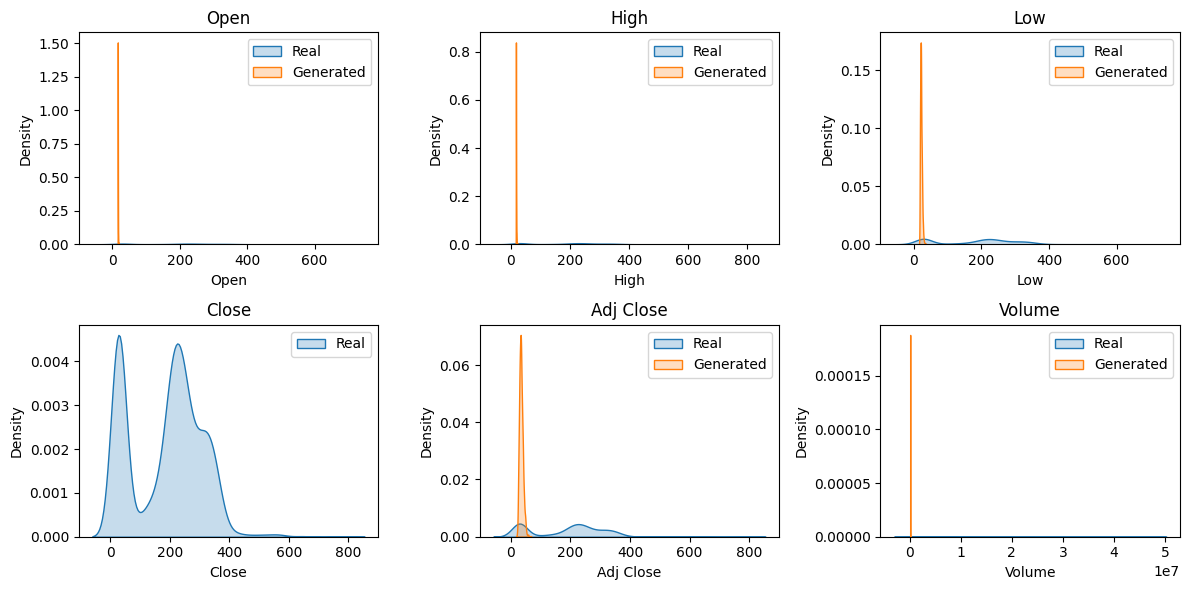

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns

# Define the dataset class
class TSLA_Dataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# Define the Generator model
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(200, 128),  # Adjusted input size to 200
            nn.ReLU(True),
            nn.Linear(128, 256),  # Additional layer with fewer neurons
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 6),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

# Define the Discriminator model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(6, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Function to compute the gradient penalty (optional, advanced tuning)
def compute_gradient_penalty(discriminator, real_data, fake_data):
    alpha = torch.rand(real_data.size(0), 1, device=device)
    interpolates = alpha * real_data + ((1 - alpha) * fake_data)
    interpolates.requires_grad_(True)
    disc_interpolates = discriminator(interpolates)
    gradients = torch.autograd.grad(outputs=disc_interpolates, inputs=interpolates,
                                    grad_outputs=torch.ones_like(disc_interpolates),
                                    create_graph=True, retain_graph=True)[0]
    gradients = gradients.view(gradients.size(0), -1)
    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean()
    return gradient_penalty

# Function to train the GAN
def train_gan(generator, discriminator, dataloader, num_epochs=1000, lr_g=0.0001, lr_d=0.00005, lambda_gp=10):
    criterion = nn.BCELoss()
    optimizer_g = optim.Adam(generator.parameters(), lr=lr_g, betas=(0.9, 0.999))
    optimizer_d = optim.Adam(discriminator.parameters(), lr=lr_d, betas=(0.9, 0.999))

    for epoch in range(num_epochs):
        for i, real_data in enumerate(dataloader):
            real_data = real_data.to(device)

            # Train Discriminator
            optimizer_d.zero_grad()
            real_decision = discriminator(real_data)
            real_loss = criterion(real_decision, torch.full_like(real_decision, 0.9))  # Label smoothing

            z = torch.randn(real_data.size(0), 200).to(device)  # Increased noise dimension
            gen_data = generator(z)
            fake_decision = discriminator(gen_data.detach())
            fake_loss = criterion(fake_decision, torch.full_like(fake_decision, 0.1))  # Label smoothing

            gradient_penalty = compute_gradient_penalty(discriminator, real_data, gen_data)  # Gradient penalty
            d_loss = real_loss + fake_loss + lambda_gp * gradient_penalty
            d_loss.backward()
            optimizer_d.step()

            # Train Generator
            optimizer_g.zero_grad()
            gen_data = generator(z)
            gen_decision = discriminator(gen_data)
            g_loss = criterion(gen_decision, torch.full_like(gen_decision, 0.9))  # Generator wants to fool discriminator
            g_loss.backward()
            optimizer_g.step()

            if (i+1) % 100 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(dataloader)}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}")

# Load dataset and preprocess
file_path = 'TSLA.csv'
df = pd.read_csv(file_path)
data = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values
scaler = MinMaxScaler(feature_range=(-1, 1))
data_normalized = scaler.fit_transform(data)
data_normalized = torch.FloatTensor(data_normalized)

# Set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Initialize models and move to device
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Initialize DataLoader
batch_size = 32  # Adjusted batch size
dataset = TSLA_Dataset(data_normalized)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Train GAN
train_gan(generator, discriminator, dataloader, num_epochs=50)  # Adjust num_epochs as needed

# Generate synthetic data
num_samples = len(data)  # Match the number of samples in the real data
z = torch.randn(num_samples, 200).to(device)  # Match the noise dimension used in training
gen_data = generator(z).detach().cpu().numpy()
gen_data = scaler.inverse_transform(gen_data)

# Create DataFrame with generated data
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
generated_df = pd.DataFrame(gen_data, columns=columns)

# Save generated data to CSV
generated_file_path = 'pranav_tuned.csv'
generated_df.to_csv(generated_file_path, index=False)
print(f"Generated data saved to {generated_file_path}")

# Load real data for comparison
real_data = pd.read_csv('TSLA.csv')[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# Statistical comparison
real_stats = real_data.describe()
gen_stats = generated_df.describe()
print("Real Data Statistics:\n", real_stats)
print("Generated Data Statistics:\n", gen_stats)

# Calculate evaluation metrics
mse = mean_squared_error(real_data.values, generated_df.values)
mae = mean_absolute_error(real_data.values, generated_df.values)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Visualization
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(real_data[col], label='Real', shade=True)
    sns.kdeplot(generated_df[col], label='Generated', shade=True)
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.show()


Batch Normalization: Added to the generator to stabilize training.
Model Capacity: Adjusted the network architecture to better capture the data distribution.
Learning Rate: Further reduced to 0.00005 for both the generator and discriminator.
Increased Epochs: Increased the training epochs to 2000 to allow more time for convergence.
Batch Size: Increased the batch size to 64 to make training more stable.
Expected Outcome:
These changes should result in synthetic data that more closely resembles the real data, as indicated by similar statistics and better evaluation metrics (MSE and MAE). The KDE plots should also show greater overlap between real and generated data distributions.

Generated data saved to pranav_tuned_v2.csv
Real Data Statistics:
               Open         High          Low        Close    Adj Close  \
count  2416.000000  2416.000000  2416.000000  2416.000000  2416.000000   
mean    186.271147   189.578224   182.916639   186.403651   186.403651   
std     118.740163   120.892329   116.857591   119.136020   119.136020   
min      16.139999    16.629999    14.980000    15.800000    15.800000   
25%      34.342498    34.897501    33.587501    34.400002    34.400002   
50%     213.035004   216.745002   208.870002   212.960007   212.960007   
75%     266.450012   270.927513   262.102501   266.774994   266.774994   
max     673.690002   786.140015   673.520020   780.000000   780.000000   

             Volume  
count  2.416000e+03  
mean   5.572722e+06  
std    4.987809e+06  
min    1.185000e+05  
25%    1.899275e+06  
50%    4.578400e+06  
75%    7.361150e+06  
max    4.706500e+07  
Generated Data Statistics:
               Open         High         

<ipython-input-5-4ce7876d1fc5>:168: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(real_data[col], label='Real', shade=True)
<ipython-input-5-4ce7876d1fc5>:169: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_df[col], label='Generated', shade=True)
<ipython-input-5-4ce7876d1fc5>:168: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(real_data[col], label='Real', shade=True)
<ipython-input-5-4ce7876d1fc5>:169: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated_df[col], label='Generated', shad

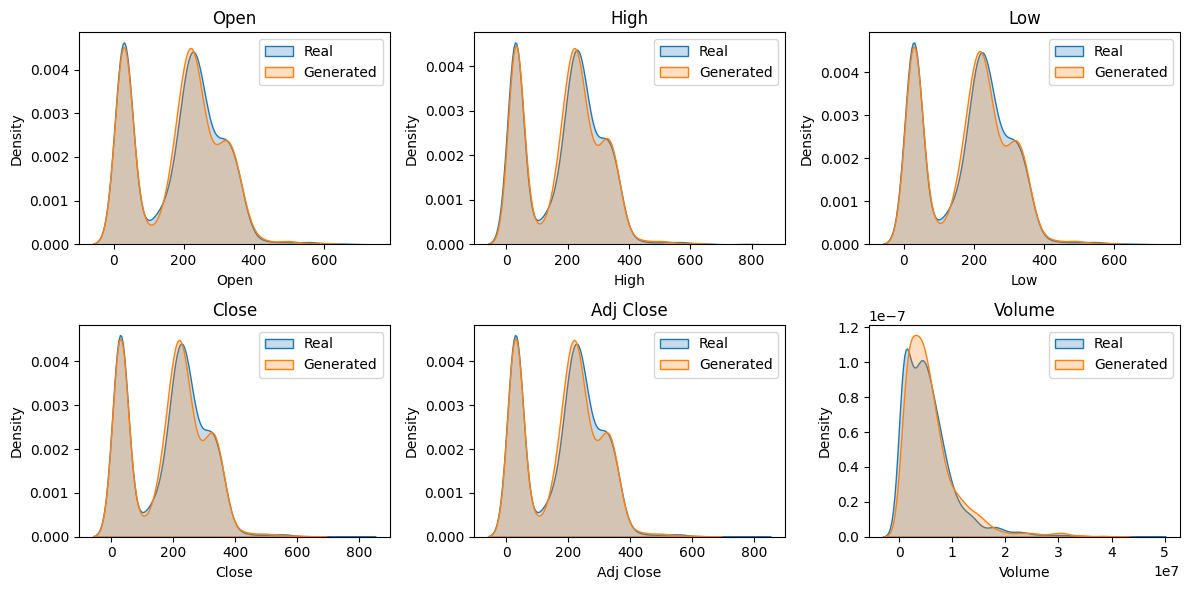

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns

# Define the dataset class
class TSLA_Dataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# Define the Generator model
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 128),
            nn.BatchNorm1d(128),  # Added BatchNorm
            nn.ReLU(True),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),  # Added BatchNorm
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),  # Added BatchNorm
            nn.ReLU(True),
            nn.Linear(512, 6),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

# Define the Discriminator model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(6, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Function to compute the gradient penalty (optional, advanced tuning)
def compute_gradient_penalty(discriminator, real_data, fake_data):
    alpha = torch.rand(real_data.size(0), 1, device=device)
    interpolates = alpha * real_data + ((1 - alpha) * fake_data)
    interpolates.requires_grad_(True)
    disc_interpolates = discriminator(interpolates)
    gradients = torch.autograd.grad(outputs=disc_interpolates, inputs=interpolates,
                                    grad_outputs=torch.ones_like(disc_interpolates),
                                    create_graph=True, retain_graph=True)[0]
    gradients = gradients.view(gradients.size(0), -1)
    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean()
    return gradient_penalty

# Function to train the GAN
def train_gan(generator, discriminator, dataloader, num_epochs=2000, lr_g=0.00005, lr_d=0.00005, lambda_gp=10):
    criterion = nn.BCELoss()
    optimizer_g = optim.Adam(generator.parameters(), lr=lr_g, betas=(0.5, 0.999))
    optimizer_d = optim.Adam(discriminator.parameters(), lr=lr_d, betas=(0.5, 0.999))

    for epoch in range(num_epochs):
        for i, real_data in enumerate(dataloader):
            real_data = real_data.to(device)

            # Train Discriminator
            optimizer_d.zero_grad()
            real_decision = discriminator(real_data)
            real_loss = criterion(real_decision, torch.full_like(real_decision, 0.9))  # Label smoothing

            z = torch.randn(real_data.size(0), 100).to(device)
            gen_data = generator(z)
            fake_decision = discriminator(gen_data.detach())
            fake_loss = criterion(fake_decision, torch.full_like(fake_decision, 0.1))  # Label smoothing

            gradient_penalty = compute_gradient_penalty(discriminator, real_data, gen_data)  # Gradient penalty
            d_loss = real_loss + fake_loss + lambda_gp * gradient_penalty
            d_loss.backward()
            optimizer_d.step()

            # Train Generator
            optimizer_g.zero_grad()
            gen_data = generator(z)
            gen_decision = discriminator(gen_data)
            g_loss = criterion(gen_decision, torch.full_like(gen_decision, 0.9))  # Generator wants to fool discriminator
            g_loss.backward()
            optimizer_g.step()

            if (i+1) % 100 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(dataloader)}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}")

# Load dataset and preprocess
file_path = 'TSLA.csv'
df = pd.read_csv(file_path)
data = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values
scaler = MinMaxScaler(feature_range=(-1, 1))
data_normalized = scaler.fit_transform(data)
data_normalized = torch.FloatTensor(data_normalized)

# Set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Initialize models and move to device
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Initialize DataLoader
batch_size = 64  # Increased batch size to stabilize training
dataset = TSLA_Dataset(data_normalized)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Train GAN
train_gan(generator, discriminator, dataloader, num_epochs=2000)  # Increased num_epochs

# Generate synthetic data
num_samples = len(data)  # Match the number of samples in the real data
z = torch.randn(num_samples, 100).to(device)  # Match the noise dimension used in training
gen_data = generator(z).detach().cpu().numpy()
gen_data = scaler.inverse_transform(gen_data)

# Create DataFrame with generated data
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
generated_df = pd.DataFrame(gen_data, columns=columns)

# Save generated data to CSV
generated_file_path = 'pranav_tuned_v2.csv'
generated_df.to_csv(generated_file_path, index=False)
print(f"Generated data saved to {generated_file_path}")

# Load real data for comparison
real_data = pd.read_csv('TSLA.csv')[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# Statistical comparison
real_stats = real_data.describe()
gen_stats = generated_df.describe()
print("Real Data Statistics:\n", real_stats)
print("Generated Data Statistics:\n", gen_stats)

# Calculate evaluation metrics
mse = mean_squared_error(real_data.values, generated_df.values)
mae = mean_absolute_error(real_data.values, generated_df.values)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Visualization
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(real_data[col], label='Real', shade=True)
    sns.kdeplot(generated_df[col], label='Generated', shade=True)
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.show()
